# Disease Prediction

## Table of Contents

I. [Import Libraries and Setup Environment](#Import-Libraries-and-Setup-Environment)

II. [Extract, Transform and Load Data](#Extract,-Transform-and-Load-Data)

a. [Clean and Transform the Data](#Clean-and-Transform-the-Data)

b. [Define Training & Test Sets](#Define-Training-&-Test-Sets)

III. [Explore Data](#Explore-Data)

a. [Compute the Distribution of the Presence/Absence of Each Symptom](#Compute-the-Distribution-of-the-Presence/Absence-of-Each-Symptom)
        
IV. [Fit Logistic Regression Model](#Fit-Logistic-Regression-Model)

V. [Test & Evaluate Model](#Test-&-Evaluate-Model)

VI. [Conclusion](#Conclusion)

V. [References](#References)


# Import Libraries and Setup Environment

In [1]:

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Extract, Transform and Load Data


<font size="4">Import Disease Prediction Data for Model Training</font> 

<font size="2"> _[source: https://www.kaggle.com/datasets/marslinoedward/disease-prediction-data/code]_ </font>

In [2]:
data_train = pd.read_csv("Disease_Prediction_Data/Training.csv")
data_test = pd.read_csv("Disease_Prediction_Data/Testing.csv")

# eye-ball the data
# print(data_train.head()), 
# print(data_test.head())

# note the number of rows and columns in the data
print(data_train.shape,
data_test.shape)

(4920, 134) (42, 133)


<font size="4">Clean and Transform the Data</font> 

In [3]:
# There's an extra unnamed column in th trainng dataset
# This will be removed
data_train = data_train.drop('Unnamed: 133', axis = 1) 

# Convert to DataFrame
df_train = pd.DataFrame(data_train)
df_test = pd.DataFrame(data_test)

# Check for missing values
missing_values_train = df_train.isnull().any().any()
missing_values_test = df_test.isnull().any().any()

# Check if there are any missingdata. Expect none
# missing_values_train, missing_values_test

<font size="4">Define Training & Test Sets</font> 

In [4]:
# define train explanatory and response variables
X_train = df_train.drop(columns=['prognosis'])
y_train = df_train['prognosis']

# define test explanatory and response variables
X_test = df_test.drop(columns=['prognosis'])
y_test = df_test['prognosis']

# Explore Data

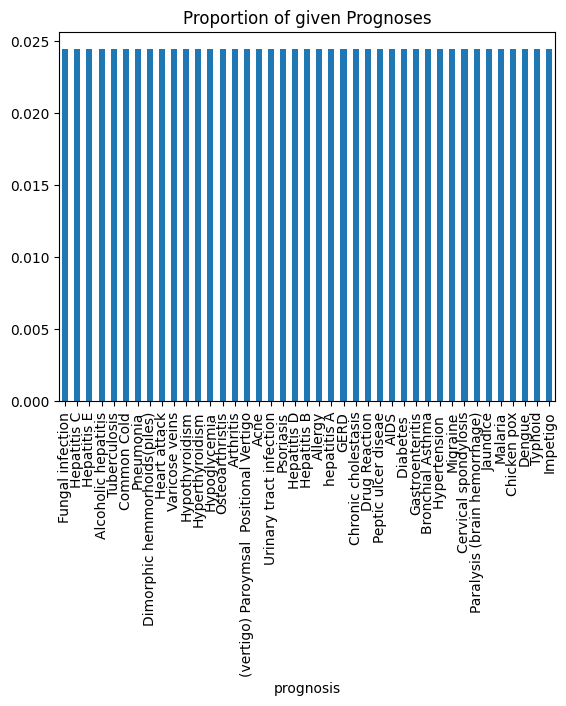

In [5]:
# check if the training response is balanced
y_train_df = pd.DataFrame({'prognosis': y_train})
y_counts = y_train_df['prognosis'].value_counts()
y_proportions = y_counts / y_counts.sum()

# plot distribution of prognosis in training set
(y_proportions).plot(kind="bar");
plt.title("Proportion of given Prognoses");

# save plot output to local drive
# plt.savefig("...\\Disease_Prediction\\Check_Data_Balance.png")

plt.show()

<font size="4">Compute the Distribution of the Presence/Absence of Each Symptom</font> 

In [6]:
# plot distributions of the explanatory variables
symptom_presence = []
symptom_absence = []

for col in X_train.columns:
    x_counts = X_train[col].value_counts()
    x_proportions = x_counts / x_counts.sum()
    
    # Check if index labels 1 and 0 exist before accessing them
    if 1 in x_proportions.index:
        presence_value = round(x_proportions.loc[1], 4)
    else:
        presence_value = 0.0
    
    if 0 in x_proportions.index:
        absence_value = round(x_proportions.loc[0], 4)
    else:
        absence_value = 0.0
    
    #print(presence_value, absence_value)
    
    # Update the presence and absence lists
    symptom_presence.append(presence_value)
    symptom_absence.append(absence_value)

# compile a data fraome of presence/absence of symptoms
symptoms_distr = pd.DataFrame({'Symptom': X_train.columns,
                                'Presence': symptom_presence,
                                'Absence': symptom_absence}).sort_values(by='Presence', ascending=False)
    

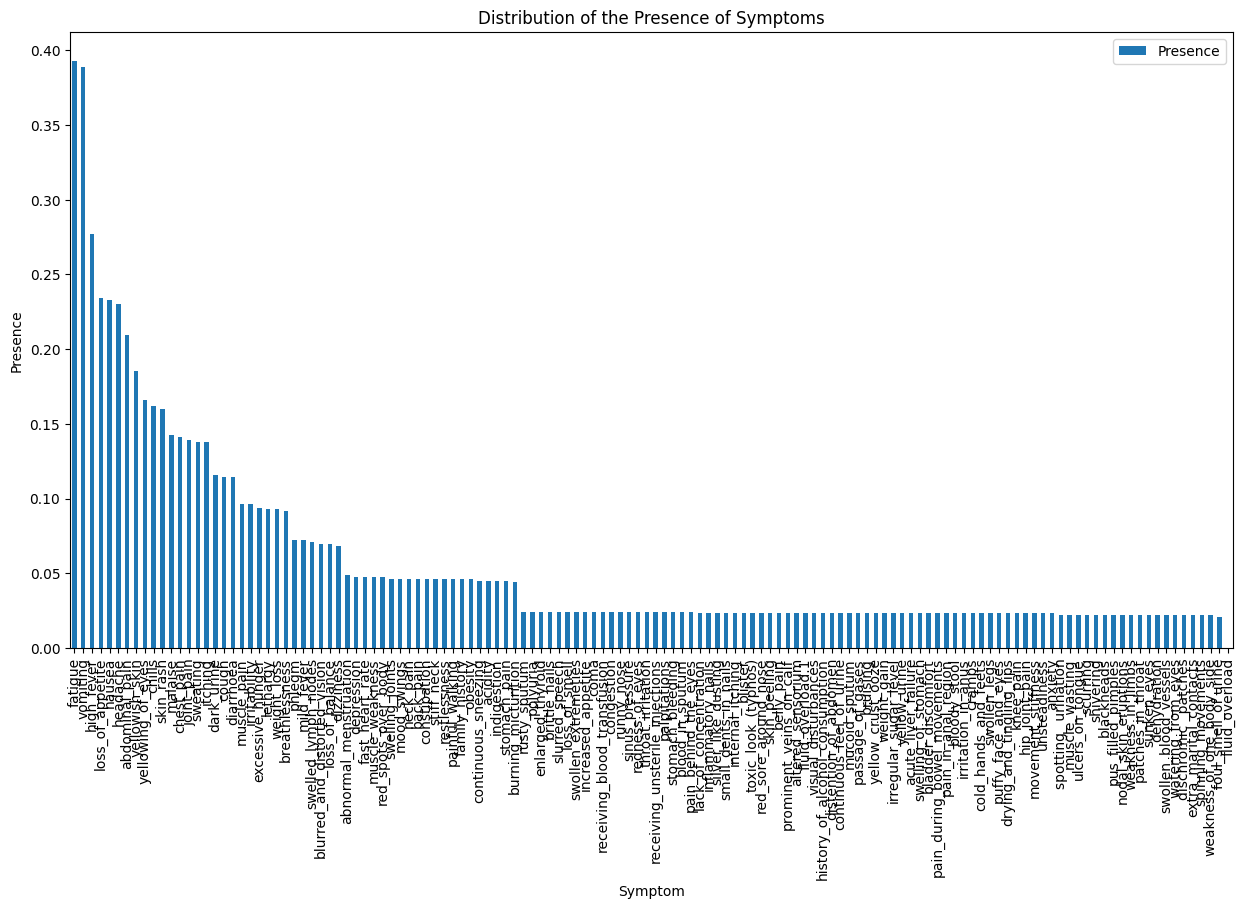

In [7]:
# plot distribution of prognosis in training set
(symptoms_distr.drop(columns=['Absence'])).plot(kind="bar", x='Symptom', figsize=(15, 8));
plt.title("Distribution of the Presence of Symptoms");
plt.xlabel('Symptom')
plt.ylabel('Presence')
#plt.xticks(rotation=1)

# save plot output to local drive
# plt.savefig("...\\Disease_Prediction\\Distr_of_Presence_Symptoms.png")

plt.show()


# Fit Logistic Regression Model

In [8]:

# fit logistic regression to the training data
logit_mdl = LogisticRegression(multi_class = 'multinomial')
logit_mdl.fit(X_train, y_train)


LogisticRegression(multi_class='multinomial')

*Permutation Importance:*
 
Permutation importance measures how much the model's performance decreases when the values of a feature are randomly shuffled. Features with higher permutation importance are more influential to the model's performance.

# Test & Evaluate Model

In [9]:
# evaluate model on both in-and out-of-sample data
y_pred_train = logit_mdl.predict(X_train)
y_pred_test = logit_mdl.predict(X_test)

print(f'Accuracy Train: {accuracy_score(y_train, y_pred_train):.4f}')
print(f'Accuracy Test: {accuracy_score(y_test, y_pred_test):.4f}')
print(X_train.shape)
print(X_test.shape)


Accuracy Train: 1.0000
Accuracy Test: 1.0000
(4920, 132)
(42, 132)


In [19]:
# Assuming you have already obtained the coefficients from a fitted logistic regression model

coefficients = logit_mdl.coef_
feature_names = X_train.columns

# Calculate absolute values of coefficients
abs_coefficients = abs(coefficients)

# Create a dictionary to map feature names to absolute coefficient values
feature_coefficients = {var: abs_coef for var, abs_coef in zip(feature_names, abs_coefficients[0])}

# Sort the dictionary by absolute coefficient values in descending order
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature coefficients
Feature = []
Coefficient = []
for feature, coef in sorted_feature_coefficients:
    Feature.append(feature), 
    Coefficient.append(coef)
    
df_coefficients = pd.DataFrame({'Feature':Feature,
                                'Absolute_Coefficient':Coefficient})
df_coefficients.head
df_coefficients.to_csv('...\\Disease_Prediction\\Feature_Impact.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: '...\\Disease_Prediction\\Confusion_Matrix.png'

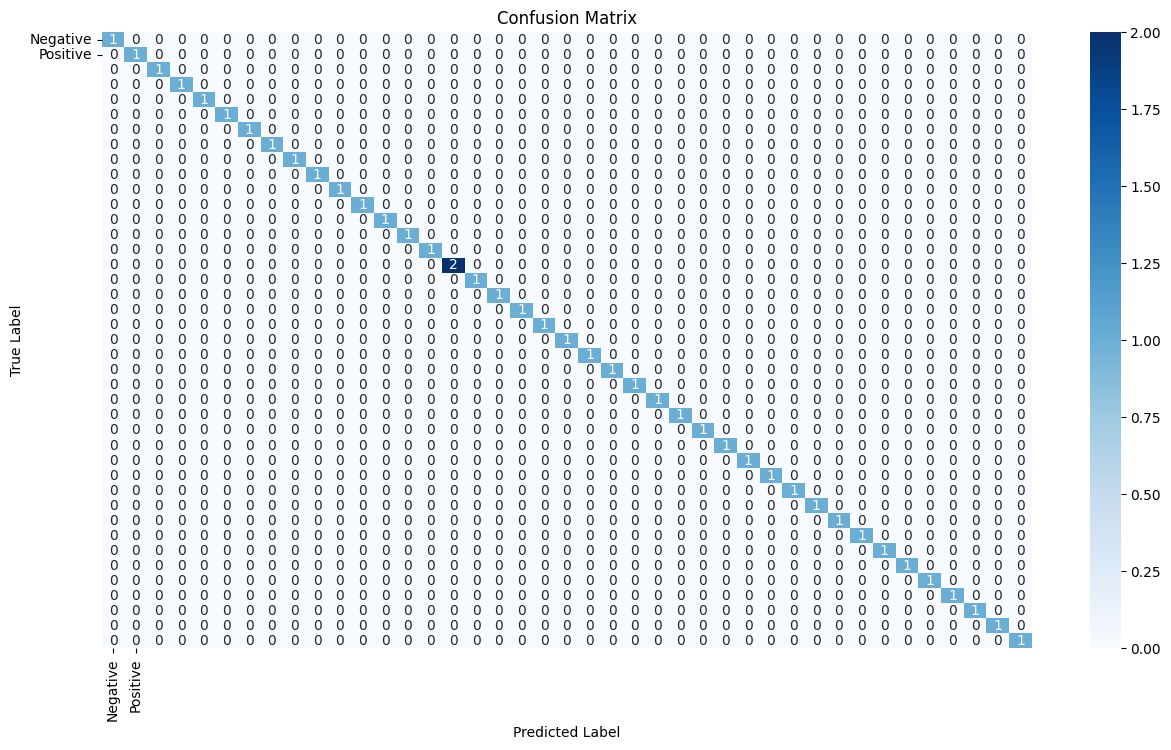

In [20]:

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# save plot output to local drive
plt.savefig("...\\Disease_Prediction\\Confusion_Matrix.png")

plt.show()


# Conclusion

The model performs admirabl well. However, this analysts assets that since this was simulated data, artifacts that and realistic uncertainity to the training and testing sets could simply be absent. As such, the model might not e as performant in a real world scenario. 

Never the less, all proper steps necessary to carry out an adequate extraction, transformation and loading and sbsequently, machine learning pipelines were taken as laid out and should prove sufficient for the study in hand.

# References

1. Edward, M. (Owner). (2024, Jan). Disease Prediction Data - Use Machine Learning and Deep Learning models to classify 42 diseases !, Version ?. Retrieved February 10, 2024 from https://www.kaggle.com/datasets/marslinoedward/disease-prediction-data. 